# Ola Bike sharing analysis

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

In [ ]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated") # to ignore infinity warning 
warnings.filterwarnings("ignore","Try using .loc[row_indexer,col_indexer] = value instead") # to use .loc # Future warning 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category='SettingWithCopyWarning') # copy warning

## Load the CSV file

In [4]:
# Selects necessary columns for analysis to reduce computational difficulties

ola = pd.read_csv("Data/Ola Customer Reviews.csv",usecols = ['rating','thumbs_up',
                                                                                                     'review_date',
                                                                                                    'developer_response',
                                                                                                     'developer_response_date',
                                                                                                    'appVersion'])

### Convert the `.CSV` file format to `.feather` format

In [6]:
%%time
ola.to_feather("Data/Ola.feather") # To reduce Computational difficulty

CPU times: total: 531 ms
Wall time: 793 ms


### Reload the file in `.feather` format

In [7]:
%%time
ola = pd.read_feather("Data/Ola.feather")

CPU times: total: 328 ms
Wall time: 607 ms


### To check `Memory Usage`

In [8]:
%%time
ola.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357698 entries, 0 to 357697
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rating                   357698 non-null  int64  
 1   thumbs_up                356807 non-null  float64
 2   review_date              357698 non-null  object 
 3   developer_response       124769 non-null  object 
 4   developer_response_date  124590 non-null  object 
 5   appVersion               275326 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.6 MB
CPU times: total: 203 ms
Wall time: 618 ms


## Preprocessing

### Check null values percentage

In [9]:
ola.isnull().sum() / ola.shape[0] *100

rating                      0.000000
thumbs_up                   0.249093
review_date                 0.000000
developer_response         65.118899
developer_response_date    65.168941
appVersion                 23.028365
dtype: float64

### Address the null Values

In [10]:
%%time
ola['appVersion'] = ola['appVersion'].replace('None',np.nan) # appVersion consists of `None` value instead of `Nan`
ola['developer_response'] = ola['developer_response'].fillna("No response") # Flag the `Nan` Values for further Analysis

CPU times: total: 78.1 ms
Wall time: 182 ms


### Address the `Data types`

In [11]:
%%time
ola['review_date'] = pd.to_datetime(ola['review_date']) # To Date Time Format
ola['developer_response_date'] = pd.to_datetime(ola['developer_response_date']) # To Date Time Format
ola['rating'] = ola['rating'].astype('category') 

CPU times: total: 406 ms
Wall time: 827 ms


### Create a new column `is_respond`

In [12]:
ola['is_respond'] = ola['developer_response'].apply(lambda s: 0 if s == 'No response' else 1).astype('int32') # I type cast as 'int32' instead of 'category' for the analysis

### Drop the Unnecessary Columns

In [13]:
ola = ola.drop(columns = ['developer_response'])

### Create new Columns like `year`, `month` and `hour`

In [14]:
ola['year'] = ola['review_date'].dt.year
ola['month'] = ola['review_date'].dt.month
ola['hour'] = ola['review_date'].dt.hour

## EDA

In [15]:
ola.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357698 entries, 0 to 357697
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   rating                   357698 non-null  category      
 1   thumbs_up                356807 non-null  float64       
 2   review_date              357698 non-null  datetime64[ns]
 3   developer_response_date  124590 non-null  datetime64[ns]
 4   appVersion               275326 non-null  object        
 5   is_respond               357698 non-null  int32         
 6   year                     357698 non-null  int32         
 7   month                    357698 non-null  int32         
 8   hour                     357698 non-null  int32         
dtypes: category(1), datetime64[ns](2), float64(1), int32(4), object(1)
memory usage: 30.1 MB


### Trend analysis based on `year`

In [16]:
year = ola.groupby('year')['review_date'].count().reset_index()

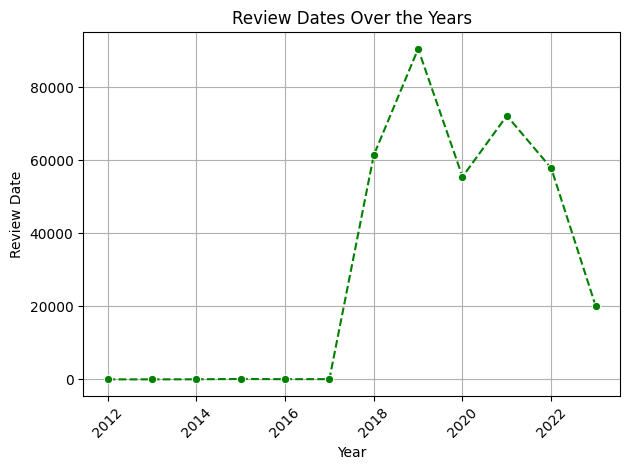

In [17]:
sns.lineplot(data =year, x = 'year', y = 'review_date',color = 'green', marker='o',linestyle = '--')
plt.title("Review Dates Over the Years")
plt.xlabel("Year")
plt.ylabel("Review Date")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation
- A significant increase in customer reviews was recorded in **2019**.
- Starting from **2017**, there was a noticeable upward trend in the number of customer reviews.

#### `2017 Onward`
1. The rise of ride-sharing apps in India during this period contributed to the growth in reviews.
2. Increased **smartphone penetration** and **affordable mobile data** (e.g., the launch of Jio in 2016) made ride-sharing apps more accessible to a broader audience.
3. Greater **awareness** and **acceptance** of app-based services encouraged more usage and customer feedback.

#### `2019 Peak`
1. Ride-sharing apps likely achieved a **larger market share**, with an established user base in metro cities as well as Tier-2 and Tier-3 cities.
2. The introduction of **new government regulations** (e.g., amendments to the Motor Vehicle Act) in 2019 could have influenced customer reviews.


### Trend analysis based on `month`

In [18]:
month = ola.groupby('month')['review_date'].count().reset_index()

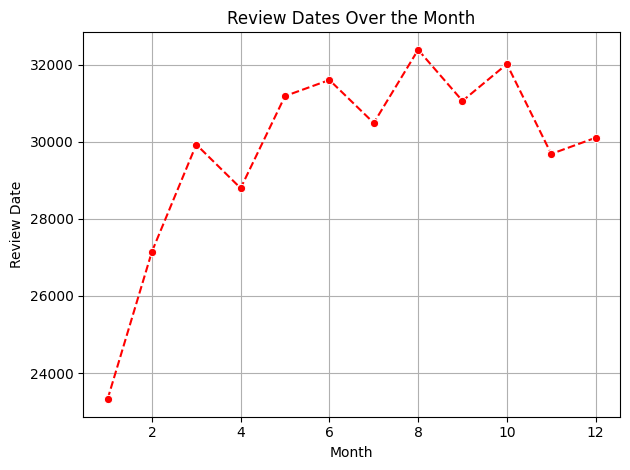

In [20]:
sns.lineplot(data =month, x = 'month', y = 'review_date',color = 'red', marker='o',linestyle = '--')
plt.title("Review Dates Over the Month")
plt.xlabel("Month")
plt.ylabel("Review Date")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation  
- The review count gradually increased from **January to March**.<br>  
- There were noticeable **fluctuations in review counts** across other months, with a **peak in August**.<br>  

### Trend analysis based on `hour`

In [22]:
hour = ola.groupby('hour')['review_date'].count().reset_index()

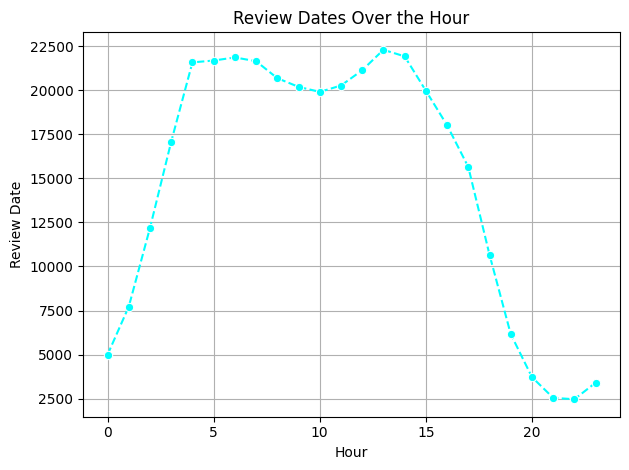

In [23]:
sns.lineplot(data =hour, x = 'hour', y = 'review_date',color = 'cyan', marker='o',linestyle = '--')
plt.title("Review Dates Over the Hour")
plt.xlabel("Hour")
plt.ylabel("Review Date")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observation  
- The majority of reviews are recorded during **4am to 6am** and **12pm to 2pm**.<br>  

#### `4am to 6am `
1. Early travelers heading to airports or train stations for morning flights or trips.<br>  
2. People returning home after late-night shifts.<br>  

#### `12pm to 2pm` 
1. Workers traveling during lunch breaks.<br>  
2. People reviewing rides taken earlier in the day.<br>  

### To analyse rating distribution based on responds by developers

In [36]:
is_respond = ola.groupby('rating')['is_respond'].sum().reset_index()

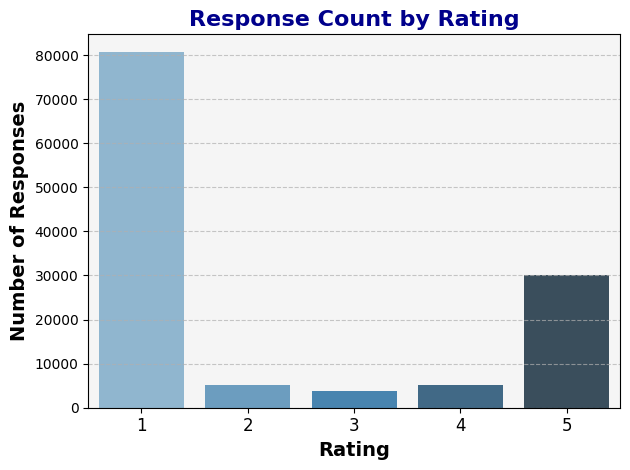

In [35]:
ax = sns.barplot(data = is_respond, x = 'rating', y = 'is_respond',palette='Blues_d', hue = None)
ax.set_title('Response Count by Rating', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Rating', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Responses', fontsize=14, fontweight='bold')

# Set grid and background color
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('whitesmoke')

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [69]:
warnings.simplefilter(action='default', category='SettingWithCopyWarning')

#### Observation  
- This chart clearly shows that developer responses are higher for the **lowest ratings**.  
- The **least response** is identified for the **3 (Neutral)** rating.  

In [37]:
ratings_with_response = ola[ola['is_respond'] == 1]['rating']
ratings_without_response = ola[ola['is_respond'] == 0]['rating']

In [38]:
# Perform t-test
t_stat, p_value = ttest_ind(ratings_with_response, ratings_without_response)

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -141.92
P-value: 0.000


#### Observation  
- A larger absolute value of the t-statistic indicates a larger difference between the groups. The negative sign suggests that the mean of the first group (likely the group with developer responses) is lower than the mean of the second group.  
- A very small p-value (typically less than 0.05) suggests that the observed differences are statistically significant, allowing us to reject the null hypothesis that there is no difference.  

> **The t-test provides evidence that there are statistically significant differences in the ratings between the two groups, and that developer responses are higher when customers provide low-rating feedback compared to high-rating feedback.**


### Appversion analysis

**After inspecting the `year`, `month`, and `appVersion`, it was found that there are no records of `appVersion` before 2018. I did not perform any imputation to address the `NaN` values because additional information regarding `appVersion` before 2018 is needed to resolve the `NaN` issue. Without this data, any imputation could introduce **bias** into the analysis. Therefore, I filtered the data to include only records from 2018 onwards.**

In [39]:
df_filtered = ola[(ola['year'] >= 2018) & (ola['year'] <= 2023)]

I replaced the `NaN` values with the **Mode** based on specific `year` and `month`.  

**But what if a particular `year` has `NaN` values for the entire `month`?**  
To address this issue, I used the **Forward Fill Method** to replace the `NaN` values, ensuring that the missing data is imputed with the most recent valid observation. This approach helps to maintain the continuity and integrity of the data.

In [50]:
def clean_appVersion(df):
    
    for year in df['year'].unique():
            year_data = df[df['year'] == year] 
    
            for month in year_data['month'].unique():
                month_data = year_data[year_data['month'] == month]
                mode_version = month_data['appVersion'].mode() 
                if not mode_version.empty: 
                    df.loc[(df['year'] == year) & (df['month'] == month), 'appVersion'] = mode_version[0]
    
                else:
                    df['appVersion'].fillna(method = 'ffill',inplace=True)
                
    return df

In [51]:
df_filtered = clean_appVersion(df_filtered)

#### To Narrow down the analysis I specifically focus on major version of apps like `3.3` not `3.3.1`

In [71]:
df_filtered.loc[:,'appVersion_short'] = df_filtered['appVersion'].str[:3]

#### To analyse `appVersion`'s Trend

#### To find the More number of High rating respective of `appVersion`

In [59]:
for i in range(1,df_filtered['rating'].nunique()+1):
    filtered = df_filtered[df_filtered['rating'] == i]
    app_v = filtered.groupby('appVersion_short')['rating'].count().idxmax()
    count = filtered.groupby('appVersion_short')['rating'].count().max()

    print(f"The appVersion with {app_v} has more count of {i} Rating and the count is {count}")
    

The appVersion with 5.5 has more count of 1 Rating and the count is 28338
The appVersion with 5.5 has more count of 2 Rating and the count is 2209
The appVersion with 4.7 has more count of 3 Rating and the count is 2026
The appVersion with 4.7 has more count of 4 Rating and the count is 3117
The appVersion with 4.8 has more count of 5 Rating and the count is 14581


##### Observation:
- **appVersion 5.5** has received more low ratings than any other versions.  
- **appVersion 4.7** and **4.8** have received more high ratings than any other versions.  

> This raises the question: **Does the appVersion have any influence on the ratings?**

#### Correlation to find any influence between appVersion and rating

In [60]:
corr = df_filtered[['appVersion_short', 'rating']].corr()

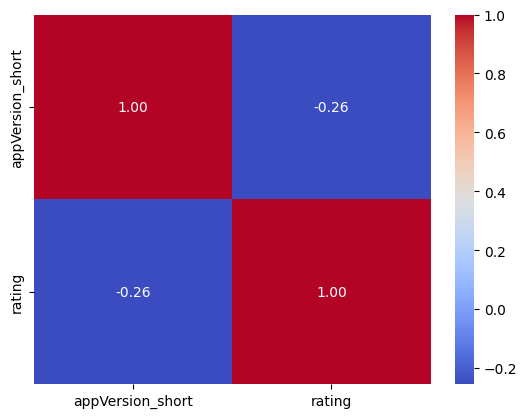

In [61]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

##### Observation:
- There is a weak negative correlation between `appVersion` and `rating`.  

**This suggests that high ratings are associated with lower app versions, but the relationship is weak. There may be other factors influencing the ratings given by our customers.**

#### To find Distribution of Low rating and High rating respective to `appVersion_short`

In [62]:
def categorize_rating(rating):
    if rating >= 4:
        return "high rating"
    else:
        return "low rating"

In [72]:
df_filtered.loc[:,'rating_category'] = df_filtered['rating'].apply(categorize_rating)

In [64]:
grouped_counts = df_filtered.groupby(['appVersion_short', 'rating_category']).size().reset_index(name='counts')
unstacked_counts = grouped_counts.pivot(index='appVersion_short', columns='rating_category', values='counts').fillna(0)
normalized_counts = unstacked_counts.div(unstacked_counts.sum(axis = 1), axis=0)

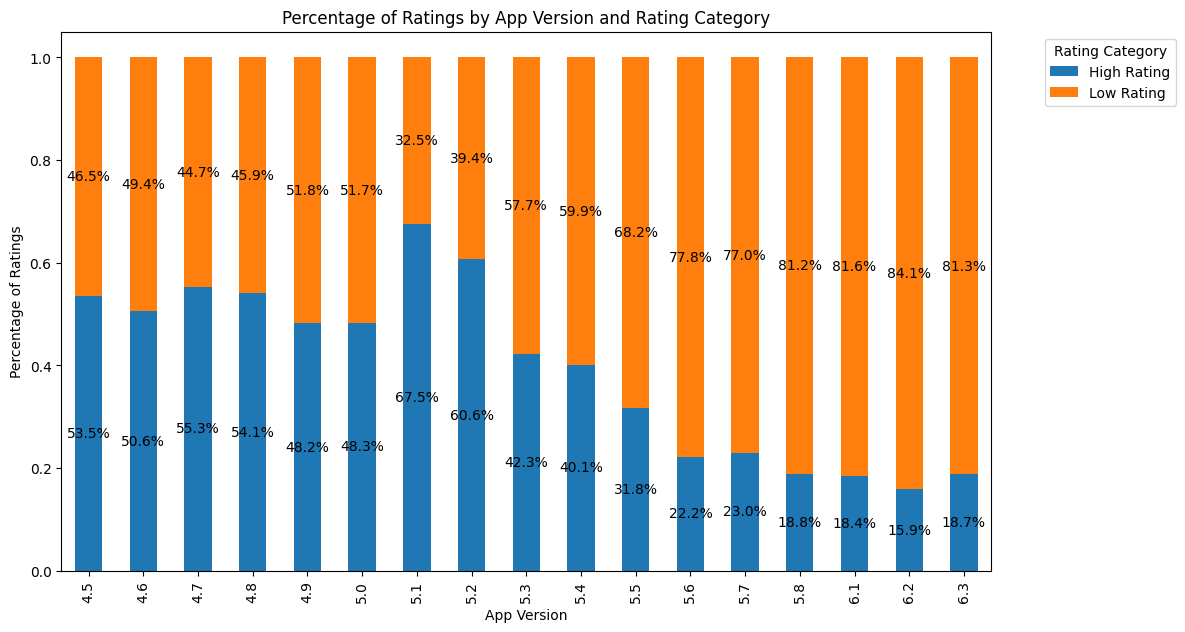

In [65]:
ax = normalized_counts.plot(kind='bar', stacked=True, figsize = (12,7))

for container in ax.containers:
    ax.bar_label(container, labels=[f'{round(height*100, 1)}%' for height in container.datavalues],label_type='center', fontsize=10, color='black')
# Set chart title and labels
plt.title('Percentage of Ratings by App Version and Rating Category')
plt.xlabel('App Version')
plt.ylabel('Percentage of Ratings')
plt.legend(['High Rating', 'Low Rating'], title='Rating Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()

##### Observation:
- This graph clearly shows that **lower versions** of the app received more high ratings than low ratings.  
- For app versions after **5.1**, the number of high ratings starts to **decrease**.

In [66]:
df_filtered.loc[:,'rating'] = pd.to_numeric(df_filtered['rating']).astype('int32') # for ANOVA
df_filtered.loc[:,'appVersion_short'] = df_filtered['appVersion_short'].astype('category')

In [67]:
grouped_ratings = df_filtered.groupby('appVersion_short')['rating'].apply(list)

# Perform ANOVA test
anova_result = stats.f_oneway(*grouped_ratings)

# Print the ANOVA test result
print(f"ANOVA Test Result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.3f}")

ANOVA Test Result: F-statistic = 2167.59, p-value = 0.000


##### Observation:
- A larger **F-statistic** generally indicates a greater difference between the groups.  
- A very small **p-value** (typically less than 0.05) suggests that the observed differences are **statistically significant**, allowing us to reject the null hypothesis that there is no difference.  

> **The ANOVA test provides evidence that there are statistically significant differences in the average ratings across the app versions.**